<a href="https://colab.research.google.com/github/worldwidekatie/Build_Week_1/blob/master/Final_BW1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Internet Attitudes Qualitative Analysis**


#1. Import libraries. Get and clean dataset.

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')

df_orig = pd.read_csv("https://raw.githubusercontent.com/worldwidekatie/Build_Week_1/master/Build_Week_1_Data_info.csv")
df_orig = df_orig.replace({np.NaN: 0})
df = df_orig[['sex','emplnw', 'party_lean', 'Language', 'Info', 'Economic', 'Connection', 'Tool']]
df.head()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
0,2,3,4,2,1.0,0.0,1.0,0.0
1,2,1,4,2,1.0,0.0,0.0,0.0
2,1,1,2,2,0.0,0.0,0.0,1.0
3,2,4,2,2,0.0,1.0,0.0,0.0
4,2,4,9,2,1.0,0.0,0.0,0.0


In [0]:
df_info = df_orig[['sex','emplnw', 'party_lean', 'Language', 'Info', 'Info.1', 
                   'Knowledge', 'News', 'Education', 'Access', 'Find', 'Research', 
                   'Share', 'Up to Date', 'Learn', 'Quantity', 'Speed', 'Ease', 
                   'Quality', 'Freely']]

df_info = df_info[df_info['Info']==1]
df_info.head()

,sex,emplnw,party_lean,Language,Info,Info.1,Knowledge,News,Education,Access,Find,Research,Share,Up to Date,Learn,Quantity,Speed,Ease,Quality,Freely
0,2,3,4,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,4,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,4,9,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10,1,1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#2. Define Functions



In [0]:
#Function for t-tests
def Ttest_loop(df1, df2):
  themes = df1.columns.tolist()
  output=[]

  for theme in themes:
    output.append([theme, df1[theme].mean(), df2[theme].mean(), 
                   stats.ttest_ind(df1[theme], df2[theme], nan_policy='omit')])

  output2 = pd.DataFrame([[i[0], i[1], i[2], i[3][0], i[3][1]] for i in output],
                  columns=['theme', 'df1', 'df2', 't-statistic', 'p-value'])

  return output2.sort_values(by=['p-value'])

#3. Run t-test and make graphs
### Starting with a graph of all major themes

In [0]:
df.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,1.439486,3.030257,2.117247,1.064297,0.633132,0.045386,0.299546,0.073374
std,0.496512,8.914973,1.551251,0.245373,0.482133,0.208228,0.458233,0.260848
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,99.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000


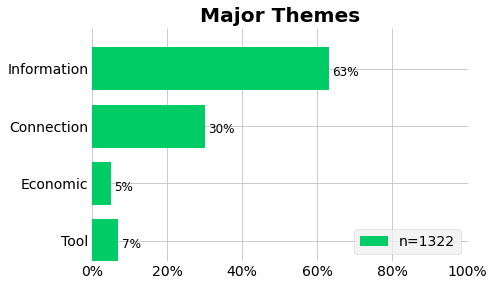

In [0]:
#Graph
df_means = [7, 5, 30, 63]
labels = ['Tool', 'Economic', 'Connection', 'Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])

fig, ax = plt.subplots()
ax.barh(x, df_means, 0.75, label='n=1322', color='#00CC66')

#ax.set_xlabel('% of Respondents who Reported Each Theme', fontsize=12)
ax.set_title('Major Themes', fontweight='bold')
ax.set_yticks(x)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Information Label
ax.text(s="63%", y=2.7, x=64, fontsize=12)

#Connection Label
ax.text(s="30%", y=1.7, x=31, fontsize=12)

#Economic Label
ax.text(s="5%", y=0.7, x=6, fontsize=12)

#Tool Label
ax.text(s="7%", y=-0.3, x=8, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()


## 3a. By political party

In [0]:
#T-Tests
rep = df[df['party_lean']==1]
dem = df[df['party_lean']==2]
rep.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,427.000000,427.000000,427.0,427.000000,427.000000,427.000000,427.000000,427.000000
mean,1.388759,2.309133,1.0,1.025761,0.658080,0.046838,0.290398,0.072600
std,0.488040,1.484817,0.0,0.158608,0.474909,0.211540,0.454479,0.259782
min,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,8.000000,1.0,2.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
dem.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,674.000000,674.000000,674.0,674.000000,674.000000,674.000000,674.000000,674.000000
mean,1.483680,2.324926,2.0,1.062315,0.632047,0.050445,0.287834,0.060831
std,0.500105,3.994766,0.0,0.241905,0.482606,0.219024,0.453090,0.239197
min,1.000000,1.000000,2.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.0,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,2.0,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,99.000000,2.0,2.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
Ttest_loop(rep, dem)

,theme,df1,df2,t-statistic,p-value
2,party_lean,1.000000,2.000000,-inf,0.000000
0,sex,1.388759,1.483680,-3.097420,0.002002
3,Language,1.025761,1.062315,-2.767966,0.005736
4,Info,0.658080,0.632047,0.877500,0.380407
7,Tool,0.072600,0.060831,0.769154,0.441967
5,Economic,0.046838,0.050445,-0.269772,0.787387
6,Connection,0.290398,0.287834,0.091394,0.927196
1,emplnw,2.309133,2.324926,-0.078323,0.937585


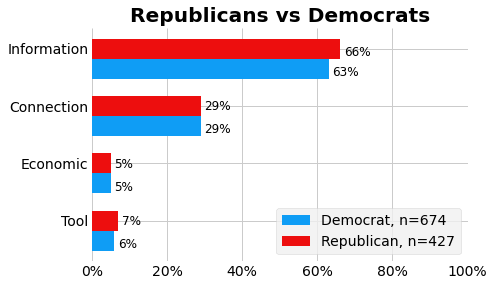

In [0]:
#Graph
rep_means = [7, 5, 29, 66]
dem_means = [6, 5, 29, 63]
labels = ['Tool', 'Economic', 'Connection', 'Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, dem_means, 0.35, label='Democrat, n=674', color='#0f9df5')
ax.barh(z, rep_means, 0.35, label='Republican, n=427', color='#ed0e0e')

#ax.set_xlabel('% of Respondents who Reported Each Theme', fontsize=12)
ax.set_title('Republicans vs Democrats', fontweight='bold')
ax.set_yticks(z)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Information Labels
ax.text(s="66%", y=3.05, x=67, fontsize=12)
ax.text(s="63%", y=2.7, x=64, fontsize=12)
#ax.text(s="p-value .4", y=3, x=73, fontsize=12)

#Connection Labels
ax.text(s="29%", y=2.1, x=30, fontsize=12)
ax.text(s="29%", y=1.7, x=30, fontsize=12)
#ax.text(s="p-value .9", y=2, x=38, fontsize=12)

#Economic Labels
ax.text(s="5%", y=1.1, x=6, fontsize=12)
ax.text(s="5%", y=0.7, x=6, fontsize=12)
#ax.text(s="p-value .8", y=1, x=14, fontsize=12)

#Tool Labels
ax.text(s="7%", y=0.1, x=8, fontsize=12)
ax.text(s="6%", y=-0.3, x=7, fontsize=12)
#ax.text(s="p-value .4", y=0, x=16, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## 3b. Employed Full-Time vs Self-Employed

In [0]:
#T-Tests
Employed = df[df['emplnw']==1]
Self_Employed = df[df['emplnw']==5]
Employed.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,1.363047,1.0,2.131280,1.066451,0.669368,0.056726,0.273906,0.071313
std,0.481268,0.0,1.533377,0.249270,0.470822,0.231506,0.446323,0.257555
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.0,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,1.0,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,1.0,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
Self_Employed.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,43.000000,43.0,43.000000,43.0,43.000000,43.000000,43.000000,43.000000
mean,1.255814,5.0,2.116279,1.0,0.627907,0.069767,0.302326,0.093023
std,0.441481,0.0,1.942131,0.0,0.489083,0.257770,0.464701,0.293903
min,1.000000,5.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.0,2.000000,1.0,1.000000,0.000000,0.000000,0.000000
75%,1.500000,5.0,2.000000,1.0,1.000000,0.000000,1.000000,0.000000
max,2.000000,5.0,9.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [0]:
Ttest_loop(Employed, Self_Employed)

,theme,df1,df2,t-statistic,p-value
1,emplnw,1.000000,5.000000,-inf,0.000000
3,Language,1.066451,1.000000,1.746851,0.081130
0,sex,1.363047,1.255814,1.419889,0.156114
4,Info,0.669368,0.627907,0.556921,0.577771
7,Tool,0.071313,0.093023,-0.529364,0.596731
6,Connection,0.273906,0.302326,-0.402635,0.687348
5,Economic,0.056726,0.069767,-0.354460,0.723108
2,party_lean,2.131280,2.116279,0.060865,0.951485


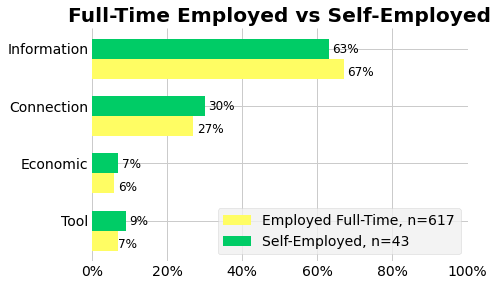

In [0]:
#Chart
employed_means = [7, 6, 27, 67]
self_employed_means = [9, 7, 30, 63]
labels = ['Tool', 'Economic', 'Connection', 'Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, employed_means, 0.35, label='Employed Full-Time, n=617', color='#fffd63')
ax.barh(z, self_employed_means, 0.35, label='Self-Employed, n=43', color='#00CC66')


#ax.set_xlabel('% of Respondents who Reported Theme', fontsize=12)
ax.set_title('Full-Time Employed vs Self-Employed', fontweight='bold')
ax.set_yticks(z)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Information Labels
ax.text(s="63%", y=3.1, x=64, fontsize=12)
ax.text(s="67%", y=2.7, x=68, fontsize=12)
#ax.text(s="p-value .6", y=3, x=74, fontsize=12)

#Connection Labels
ax.text(s="30%", y=2.1, x=31, fontsize=12)
ax.text(s="27%", y=1.7, x=28, fontsize=12)
#ax.text(s="p-value .7", y=2, x=39, fontsize=12)

#Economic Labels
ax.text(s="7%", y=1.1, x=8, fontsize=12)
ax.text(s="6%", y=0.7, x=7, fontsize=12)
#ax.text(s="p-value .7", y=1, x=14, fontsize=12)

#Tool Labels
ax.text(s="9%", y=0.1, x=10, fontsize=12)
ax.text(s="7%", y=-0.3, x=7, fontsize=12)
#ax.text(s="p-value .6", y=0, x=16, fontsize=12)

# Take away background color
fig.set_facecolor(color="None")
ax.set_facecolor(color="None")

# Turn off spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

##3c. Spanish and English

In [0]:
#T-Tests
Spanish = df[df['Language']==2]
English = df[df['Language']==1]
Spanish.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,85.000000,85.000000,85.000000,85.0,85.000000,85.000000,85.000000,85.000000
mean,1.517647,2.247059,2.705882,2.0,0.447059,0.129412,0.352941,0.129412
std,0.502654,1.572879,1.717026,0.0,0.500140,0.337647,0.480721,0.337647
min,1.000000,1.000000,1.000000,2.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,2.0,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.0,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,3.000000,2.0,1.000000,0.000000,1.000000,0.000000
max,2.000000,8.000000,9.000000,2.0,1.000000,1.000000,1.000000,1.000000


In [0]:
English.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,1237.000000,1237.000000,1237.000000,1237.0,1237.000000,1237.000000,1237.000000,1237.000000
mean,1.434115,3.084074,2.076799,1.0,0.645918,0.039612,0.295877,0.069523
std,0.495841,9.204845,1.531678,0.0,0.478428,0.195125,0.456621,0.254444
min,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,1.0,1.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,2.000000,1.0,1.000000,0.000000,1.000000,0.000000
max,2.000000,99.000000,9.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [0]:
Ttest_loop(Spanish, English)

,theme,df1,df2,t-statistic,p-value
3,Language,2.000000,1.000000,inf,0.000000
5,Economic,0.129412,0.039612,3.866309,0.000116
4,Info,0.447059,0.645918,-3.695966,0.000228
2,party_lean,2.705882,2.076799,3.633301,0.000291
7,Tool,0.129412,0.069523,2.050042,0.040558
0,sex,1.517647,1.434115,1.501097,0.133570
6,Connection,0.352941,0.295877,1.110692,0.266903
1,emplnw,2.247059,3.084074,-0.837226,0.402617


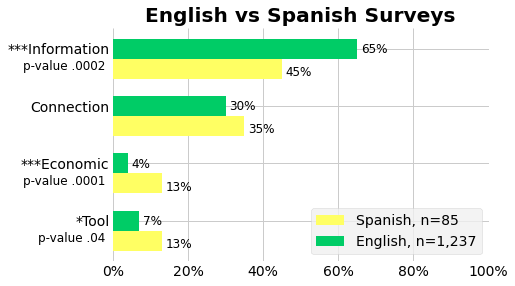

In [0]:
spanish_means = [13, 13, 35, 45]
english_means = [7, 4, 30, 65]
labels = ['*Tool', '***Economic', 'Connection', '***Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, spanish_means, 0.35, label='Spanish, n=85', color='#ffff63')
ax.barh(z, english_means, 0.35, label='English, n=1,237', color='#00cc66')


#ax.set_xlabel('% of Respondents who Reported Theme', fontsize=12)
ax.set_title('English vs Spanish Surveys', fontweight='bold')
ax.set_yticks(z)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Information Labels
ax.text(s="65%", y=3.1, x=66, fontsize=12)
ax.text(s="45%", y=2.7, x=46, fontsize=12)
ax.text(s="p-value .0002", y=2.8, x=-24, fontsize=12)

#Connection Labels
ax.text(s="30%", y=2.1, x=31, fontsize=12)
ax.text(s="35%", y=1.7, x=36, fontsize=12)
#ax.text(s="p-value .3", y=1.8, x=45, fontsize=12)

#Economic Labels
ax.text(s="4%", y=1.1, x=5, fontsize=12)
ax.text(s="13%", y=0.7, x=14, fontsize=12)
ax.text(s="p-value .0001", y=0.8, x=-24, fontsize=12)

#Tool Labels
ax.text(s="7%", y=0.1, x=8, fontsize=12)
ax.text(s="13%", y=-0.3, x=14, fontsize=12)
ax.text(s="p-value .04", y=-0.2, x=-20, fontsize=12)

# Take away background color
fig.set_facecolor(color="None")
ax.set_facecolor(color="None")

# Turn off spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

##3d. Gender

In [0]:
#T-Tests
female = df[df['sex']==2]
male = df[df['sex']==1]

female.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,581.0,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,2.0,3.032702,2.123924,1.075731,0.641997,0.037866,0.320138,0.077453
std,0.0,8.122168,1.510354,0.264796,0.479826,0.191036,0.466931,0.267539
min,2.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.0,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.0,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.0,99.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
male.describe()

,sex,emplnw,party_lean,Language,Info,Economic,Connection,Tool
count,741.0,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,1.0,3.028340,2.112011,1.055331,0.626181,0.051282,0.283401,0.070175
std,0.0,9.495832,1.583574,0.228779,0.484143,0.220721,0.450954,0.255615
min,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.0,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.0,99.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
Ttest_loop(male, female)

,theme,df1,df2,t-statistic,p-value
0,sex,1.000000,2.000000,-inf,0.000000
3,Language,1.055331,1.075731,-1.501097,0.133570
6,Connection,0.283401,0.320138,-1.447364,0.148032
5,Economic,0.051282,0.037866,1.162878,0.245089
4,Info,0.626181,0.641997,-0.591830,0.554066
7,Tool,0.070175,0.077453,-0.503313,0.614828
2,party_lean,2.112011,2.123924,-0.138540,0.889834
1,emplnw,3.028340,3.032702,-0.008827,0.992959


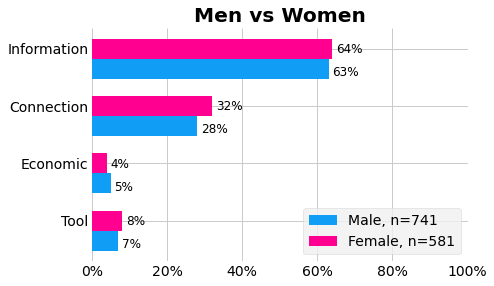

In [0]:
male_means = [7, 5, 28, 63]
female_means = [8, 4, 32, 64]
labels = ['Tool', 'Economic', 'Connection', 'Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, male_means, 0.35, label='Male, n=741', color='#0f9df5')
ax.barh(z, female_means, 0.35, label='Female, n=581', color='#ff0090')


#ax.set_xlabel('% of Respondents who Reported Theme', fontsize=12)
ax.set_title('Men vs Women', fontweight='bold')
ax.set_yticks(z)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Information Labels
ax.text(s="64%", y=3.1, x=65, fontsize=12)
ax.text(s="63%", y=2.7, x=64, fontsize=12)
#ax.text(s="p-value .55", y=2.5, x=-24, fontsize=12)

#Connection Labels
ax.text(s="32%", y=2.1, x=33, fontsize=12)
ax.text(s="28%", y=1.7, x=29, fontsize=12)
#ax.text(s="p-value .15", y=1.8, x=45, fontsize=12)

#Economic Labels
ax.text(s="4%", y=1.1, x=5, fontsize=12)
ax.text(s="5%", y=0.7, x=6, fontsize=12)
#ax.text(s="p-value .25", y=0.5, x=-24, fontsize=12)

#Tool Labels
ax.text(s="8%", y=0.1, x=9, fontsize=12)
ax.text(s="7%", y=-0.3, x=8, fontsize=12)
#ax.text(s="p-value .61", y=-0.5, x=-20, fontsize=12)

# Take away background color
fig.set_facecolor(color="None")
ax.set_facecolor(color="None")

# Turn off spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

#Information Sub-Themes Analysis

In [0]:
df_info = df_orig[['sex','emplnw', 'party_lean', 'Language', 'Info', 'Info.1', 
                   'Knowledge', 'News', 'Education', 'Access', 'Find', 'Research', 
                   'Share', 'Up to Date', 'Learn', 'Quantity', 'Speed', 'Ease', 
                   'Quality', 'Freely']]

df_info = df_info[df_info['Info']==1]
df_info.head()

,sex,emplnw,party_lean,Language,Info,Info.1,Knowledge,News,Education,Access,Find,Research,Share,Up to Date,Learn,Quantity,Speed,Ease,Quality,Freely
0,2,3,4,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,4,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,4,9,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10,1,1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#T-Tests
women = df_info[df_info['sex']==2]
men = df_info[df_info['sex']==1]

Ttest_loop(men, women)

,theme,df1,df2,t-statistic,p-value
0,sex,1.000000,2.000000,-inf,0.000000
12,Share,0.131466,0.064343,3.211225,0.001372
8,Education,0.066810,0.117962,-2.582496,0.009978
5,Info.1,0.670259,0.587131,2.486537,0.013094
19,Freely,0.047414,0.018767,2.256586,0.024292
11,Research,0.047414,0.080429,-1.968972,0.049287
13,Up to Date,0.056034,0.091153,-1.959751,0.050357
10,Find,0.120690,0.155496,-1.459306,0.144857
9,Access,0.353448,0.316354,1.128040,0.259627
17,Ease,0.118534,0.144772,-1.120543,0.262804


In [0]:
men.describe()

,sex,emplnw,party_lean,Language,Info,Info.1,Knowledge,News,Education,Access,Find,Research,Share,Up to Date,Learn,Quantity,Speed,Ease,Quality,Freely
count,464.0,464.000000,464.000000,464.000000,464.0,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,1.0,2.463362,2.034483,1.038793,1.0,0.670259,0.101293,0.060345,0.066810,0.353448,0.120690,0.047414,0.131466,0.056034,0.043103,0.109914,0.101293,0.118534,0.036638,0.047414
std,0.0,6.527790,1.436525,0.193310,0.0,0.470627,0.302042,0.238382,0.249963,0.478556,0.326118,0.212752,0.338273,0.230237,0.203309,0.313120,0.302042,0.323589,0.188074,0.212752
min,1.0,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,3.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,99.000000,9.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
women.describe()

,sex,emplnw,party_lean,Language,Info,Info.1,Knowledge,News,Education,Access,Find,Research,Share,Up to Date,Learn,Quantity,Speed,Ease,Quality,Freely
count,373.0,373.000000,373.000000,373.000000,373.0,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,2.0,2.790885,2.128686,1.053619,1.0,0.587131,0.083110,0.075067,0.117962,0.316354,0.155496,0.080429,0.064343,0.091153,0.045576,0.093834,0.115282,0.144772,0.042895,0.018767
std,0.0,7.201346,1.604616,0.225567,0.0,0.493011,0.276419,0.263853,0.322997,0.465677,0.362864,0.272321,0.245693,0.288213,0.208845,0.291989,0.319790,0.352344,0.202894,0.135883
min,2.0,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.0,2.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.0,3.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.0,99.000000,9.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


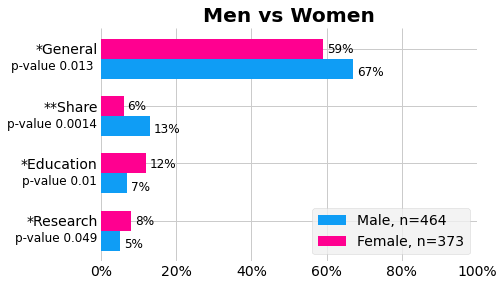

In [0]:
male_means = [5, 7, 13, 67]
female_means = [8, 12, 6, 59]
labels = ['*Research', '*Education', '**Share', '*General']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, male_means, 0.35, label='Male, n=464', color='#0f9df5')
ax.barh(z, female_means, 0.35, label='Female, n=373', color='#ff0090')


#ax.set_xlabel('% of Respondents who Reported Theme', fontsize=12)
ax.set_title('Men vs Women', fontweight='bold')
ax.set_yticks(z)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#General Info Labels
ax.text(s="59%", y=3.1, x=60, fontsize=12)
ax.text(s="67%", y=2.7, x=68, fontsize=12)
ax.text(s="p-value 0.013", y=2.8, x=-24, fontsize=12)

#Share Labels
ax.text(s="6%", y=2.1, x=7, fontsize=12)
ax.text(s="13%", y=1.7, x=14, fontsize=12)
ax.text(s="p-value 0.0014", y=1.8, x=-25, fontsize=12)

#Education Labels
ax.text(s="12%", y=1.1, x=13, fontsize=12)
ax.text(s="7%", y=0.7, x=8, fontsize=12)
ax.text(s="p-value 0.01", y=0.8, x=-21, fontsize=12)

#Research Labels
ax.text(s="8%", y=0.1, x=9, fontsize=12)
ax.text(s="5%", y=-0.3, x=6, fontsize=12)
ax.text(s="p-value 0.049", y=-0.2, x=-23, fontsize=12)

# Take away background color
fig.set_facecolor(color="None")
ax.set_facecolor(color="None")

# Turn off spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [0]:
df_info2 = df_info[['Info.1', 
                   'Knowledge', 'News', 'Education', 'Access', 'Find', 'Research', 
                   'Share', 'Up to Date', 'Learn', 'Quantity', 'Speed', 'Ease', 
                   'Quality']]

df_info2.describe()

,Info.1,Knowledge,News,Education,Access,Find,Research,Share,Up to Date,Learn,Quantity,Speed,Ease,Quality
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.633214,0.093190,0.066906,0.089606,0.336918,0.136201,0.062127,0.101553,0.071685,0.044205,0.102748,0.107527,0.130227,0.039427
std,0.482216,0.290872,0.250008,0.285787,0.472939,0.343207,0.241530,0.302240,0.258119,0.205674,0.303811,0.309967,0.336754,0.194724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
import plotly.graph_objects as go
info_themes=['General Info', 'Access', 'Find', 'Ease', 'Speed', 'Share', 'Quantity', 
             'Knowledge', 'Education', 'News', 'Up-to-Date', 'Research',
             'Quality', 'Learn']
info_means=[63,34,14,13,11,10,10,9,9,7,7,6,4,4,3]
info_themes_labels=['63%', '34%', '14%', '13%', '11%', '10%', '10%', '9%', '9%', 
                 '7%', '7%', '6%', '4%', '4%']

fig = go.Figure([go.Bar(x=info_themes, y=info_means, text=info_themes_labels, 
                        textposition='outside', marker_color='#00CC66')])

fig.update_layout(
    title="<b>Information Sub-Themes, n=837</b>",
    title_x=0.5, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

fig['layout']['yaxis'].update(title='% of Respondents Reporting', range=[0, 100], dtick=10, autorange=False)
fig.show()

In [0]:
ease = df_info2['Ease']
speed = df_info2['Speed']
quantity = df_info2['Quantity']
quality = df_info2['Quality']

print(stats.ttest_ind(ease, speed))
print(stats.ttest_ind(quantity, speed))
print(stats.ttest_ind(quantity, quality))

Ttest_indResult(statistic=1.4348827618320428, pvalue=0.15150752628966727)
Ttest_indResult(statistic=-0.3185510681678709, pvalue=0.7501067493599535)
Ttest_indResult(statistic=5.076646448650896, pvalue=4.270432359538873e-07)


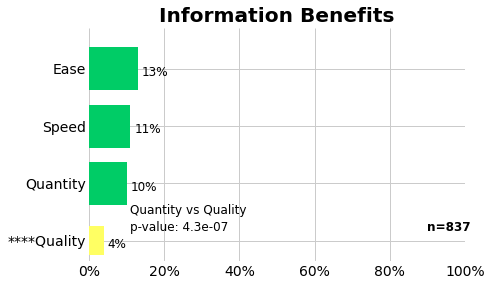

In [0]:
#Graph
info_means = [10,11,13]
labels = ['****Quality', 'Quantity', 'Speed', 'Ease']
x = np.array([-0.175,  0.825,  1.825,  2.825])
x1 = np.array([0.825,  1.825,  2.825])

fig, ax = plt.subplots()
ax.barh(x1, info_means, 0.75, label='n=837', color='#00CC66')
ax.barh(-0.175, 4, 0.5, color='#ffff63')

#ax.set_xlabel('% of Respondents who Reported Each Theme', fontsize=12)
ax.set_title('Information Benefits', fontweight='bold')
ax.set_yticks(x)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.text(s='n=837', y=0, x=90, fontsize=12, fontweight='bold')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Ease Label
ax.text(s="13%", y=2.7, x=14, fontsize=12)

#Speed Label
ax.text(s="11%", y=1.7, x=12, fontsize=12)

#Quantity Label
ax.text(s="10%", y=0.7, x=11, fontsize=12)

#Quality Label
ax.text(s="4%", y=-0.3, x=5, fontsize=12)
ax.text(s="Quantity vs Quality", y=0.3, x=11, fontsize=12)
ax.text(s="p-value: 4.3e-07", y=0, x=11, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [0]:
info = df_info2['Info.1']
knowledge = df_info2['Knowledge']
education = df_info2['Education']
news = df_info2['News']
print(stats.ttest_ind(info, knowledge))
print(stats.ttest_ind(education, knowledge))
print(stats.ttest_ind(news, education))

Ttest_indResult(statistic=27.742856772117435, pvalue=1.1486469065041002e-139)
Ttest_indResult(statistic=-0.2542947926799891, pvalue=0.799299091773066)
Ttest_indResult(statistic=-1.729582522597885, pvalue=0.08388944729416796)


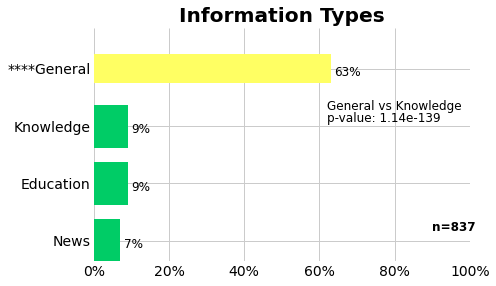

In [0]:
#Graph
info_means = [7,9,9]
labels = ['News', 'Education', 'Knowledge', '****General']
x = np.array([-0.175,  0.825,  1.825,  2.825])
x1 = np.array([-0.175, 0.825,  1.825,])

fig, ax = plt.subplots()
ax.barh(x1, info_means, 0.75, label='n=837', color='#00CC66')
ax.barh(2.825, 63, 0.5, color='#ffff63')

#ax.set_xlabel('% of Respondents who Reported Each Theme', fontsize=12)
ax.set_title('Information Types', fontweight='bold')
ax.set_yticks(x)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.text(s='n=837', y=0, x=90, fontsize=12, fontweight='bold')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Info Label
ax.text(s="63%", y=2.7, x=64, fontsize=12)
ax.text(s="General vs Knowledge", y=2.1, x=62, fontsize=12)
ax.text(s="p-value: 1.14e-139", y=1.9, x=62, fontsize=12)

#Knowledge Label
ax.text(s="9%", y=1.7, x=10, fontsize=12)

#Education Label
ax.text(s="9%", y=0.7, x=10, fontsize=12)

#News Label
ax.text(s="7%", y=-0.3, x=8, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [0]:
access = df_info2['Access']
find = df_info2['Find']
research = df_info2['Research']
learn = df_info2['Learn']

print(stats.ttest_ind(access, find))
print(stats.ttest_ind(research, find))
print(stats.ttest_ind(research, learn))

Ttest_indResult(statistic=9.937456972349313, pvalue=1.1973228953324565e-22)
Ttest_indResult(statistic=-5.106407384317526, pvalue=3.6587666629761844e-07)
Ttest_indResult(statistic=1.634354967619264, pvalue=0.10237258844531161)


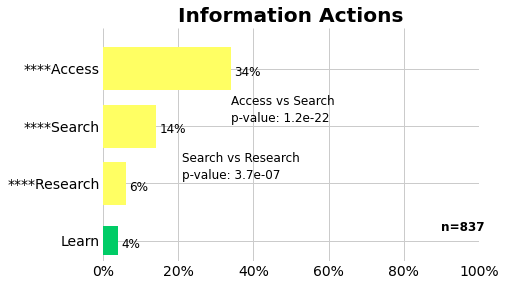

In [0]:
#Graph
info_means = [6,14,34]
labels = ['Learn', '****Research', '****Search', '****Access']
x = np.array([-0.175,  0.825,  1.825,  2.825])
x1 = np.array([0.825,  1.825,  2.825])

fig, ax = plt.subplots()
ax.barh(x1, info_means, 0.75, color='#ffff63')
ax.barh(-0.175, 4, 0.5, color='#00CC66')

#ax.set_xlabel('% of Respondents who Reported Each Theme', fontsize=12)
ax.set_title('Information Actions', fontweight='bold')
ax.set_yticks(x)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.text(s='n=837', y=0, x=90, fontsize=12, fontweight='bold')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Access Label
ax.text(s="34%", y=2.7, x=35, fontsize=12)
ax.text(s="Access vs Search", y=2.2, x=34, fontsize=12)
ax.text(s="p-value: 1.2e-22", y=1.9, x=34, fontsize=12)

#Search Label
ax.text(s="14%", y=1.7, x=15, fontsize=12)
ax.text(s="Search vs Research", y=1.2, x=21, fontsize=12)
ax.text(s="p-value: 3.7e-07", y=.9, x=21, fontsize=12)

#Research Label
ax.text(s="6%", y=0.7, x=7, fontsize=12)

#Learn Label
ax.text(s="4%", y=-0.3, x=5, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

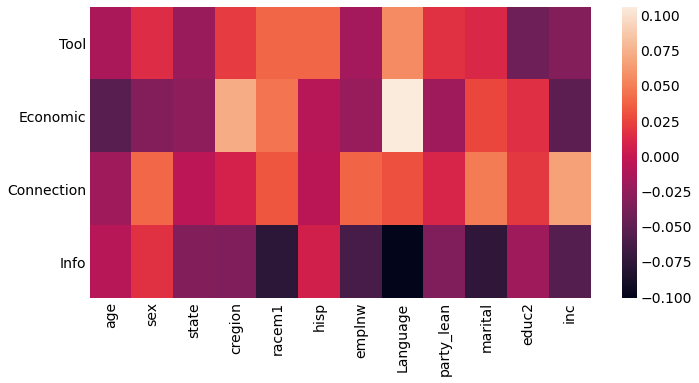

In [0]:
import seaborn as sns
focus_cols = ['age', 'sex', 'state', 'cregion', 'racem1', 'hisp', 'emplnw', 'Language',
              'party_lean', 'marital', 'educ2', 'inc']

df_corr = df_orig.drop(columns=['Info.1', 
                   'Knowledge', 'News', 'Education', 'Access', 'Find', 'Research', 
                   'Share', 'Up to Date', 'Learn', 'Quantity', 'Speed', 'Ease', 
                   'Quality', 'Other', 'Other.1', 'Freely'])

fig, ax = plt.subplots(figsize=(10,5)) 

df_corr2 = df_corr.corr().filter(focus_cols).drop(focus_cols)

sns.heatmap(df_corr2, annot=False);

fig.set_facecolor(color="None")

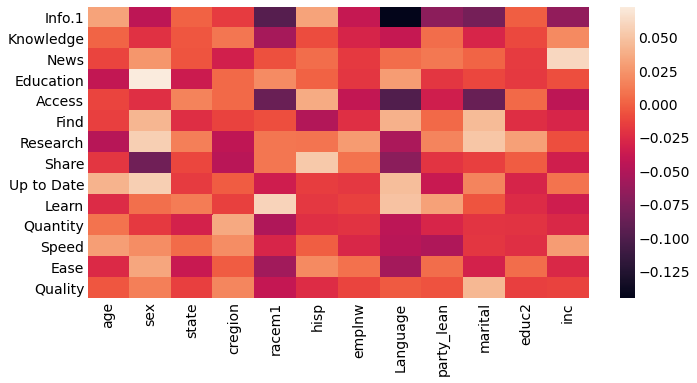

In [0]:
focus_cols = ['age', 'sex', 'state', 'cregion', 'racem1', 'hisp', 'emplnw', 'Language',
              'party_lean', 'marital', 'educ2', 'inc']

df_corr = df_orig.drop(columns=['Info', 'Tool', 'Economic', 'Connection', 'Other', 'Other.1', 'Freely'])

df_corr2 = df_corr.corr().filter(focus_cols).drop(focus_cols)

fig, ax = plt.subplots(figsize=(10,5)) 
import seaborn as sns
matrix = np.triu(df_corr2)
sns.heatmap(df_corr2);
# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")


         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

            #annot=False, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix);

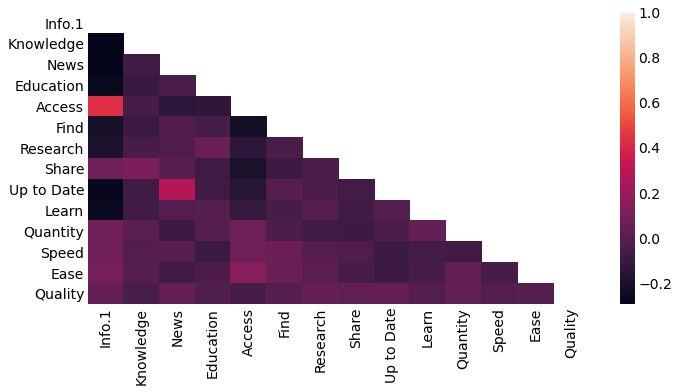

In [0]:
fig, ax = plt.subplots(figsize=(10,5)) 

matrix = np.triu(df_info2.corr())
sns.heatmap(df_info2.corr(), mask=matrix);
# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")